In [130]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import root_mean_squared_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

In [87]:
df_countries = pd.read_csv("./data/countries.csv", sep=";", decimal=",")
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          165 non-null    object 
 1   child_mort       165 non-null    float64
 2   exports          165 non-null    float64
 3   health           165 non-null    float64
 4   imports          165 non-null    float64
 5   income           165 non-null    int64  
 6   inflation        165 non-null    float64
 7   life_expec       165 non-null    float64
 8   total_fer        165 non-null    float64
 9   gdpp             165 non-null    int64  
 10  income_category  165 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 14.3+ KB


In [88]:
df_countries.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_category
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Low income
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Upper middle income
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Lower middle income
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Lower middle income
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,High income
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Upper middle income
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Upper middle income
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,High income
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,High income
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Upper middle income


In [89]:
df_countries.tail(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_category
155,Ukraine,11.7,47.1,7.72,51.1,7820,13.40,70.4,1.44,2970,Lower middle income
156,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.50,76.5,1.87,35000,High income
157,United Kingdom,5.2,28.2,9.64,30.8,36200,1.57,80.3,1.92,38900,High income
158,United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400,High income
159,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,High income
160,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,Lower middle income
161,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Lower middle income
162,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Lower middle income
163,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Low income
164,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460,Lower middle income


## Exploratory Data Analysis


### Univariate Analysis


In [90]:
df_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,38.567273,41.193327,6.825576,46.999793,17183.412121,7.585612,70.505455,2.959818,13011.963636
std,40.480851,27.560749,2.759425,24.233083,19389.968166,10.198185,8.935045,1.518166,18428.279743
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,7.900000,23.800000,4.930000,30.400000,3340.000000,1.770000,65.300000,1.800000,1310.000000
50%,19.700000,35.000000,6.320000,43.300000,9940.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.200000,51.400000,8.650000,58.900000,22900.000000,10.600000,76.800000,3.910000,14600.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [91]:
income_category_percentage = (
    df_countries.income_category.value_counts(normalize=True) * 100
)
px.bar(
    income_category_percentage,
    title="Income Category Distribution",
    color=income_category_percentage.index,
)

In [92]:
# Income distribution
px.histogram(
    df_countries,
    x="income",
    title="Income Distribution",
    labels={"income": "Income"},
    color="income_category",
    nbins=30,
)

In [93]:
# GBP per capita distribution (PIB per capita)
px.histogram(
    df_countries,
    x="gdpp",
    title="GDP per capita Distribution",
    labels={"gdpp": "GDP per capita"},
    color="income_category",
    nbins=30,
)

In [94]:
# Inflation distribution (PIB per capita)
px.histogram(
    df_countries,
    x="inflation",
    title="Inflation Distribution",
    labels={"inflation": "Inflation"},
    color="income_category",
    nbins=30,
)

In [95]:
# Life expectation distribution (PIB per capita)
px.histogram(
    df_countries,
    x="life_expec",
    title="Life Expectation Distribution",
    labels={"life_expec": "Life Expectation"},
    color="income_category",
    nbins=30,
)

## Bivariate Analysis


In [96]:
# Creates a horizontal box plot to visualize the income distribution by income category.
px.box(
    df_countries,
    x="income",
    y="income_category",
    color="income_category",
    orientation="h",
    hover_data=["country"],
    title="Income Distribution by Income Category",
)

In [97]:
# Creates a horizontal box plot to visualize the GDP per capita distribution by income category.
px.box(
    df_countries,
    x="gdpp",
    y="income_category",
    color="income_category",
    orientation="h",
    hover_data=["country"],
    title="GDP per capita by Income Category",
)

In [98]:
# Creates a horizontal box plot to visualize the inflation distribution by income category.
px.box(
    df_countries,
    x="inflation",
    y="income_category",
    color="income_category",
    orientation="h",
    hover_data=["country"],
    title="Inflation by Income Category",
)

In [99]:
# Creates a horizontal box plot to visualize the life expectation distribution by income category.
px.box(
    df_countries,
    x="life_expec",
    y="income_category",
    color="income_category",
    orientation="h",
    hover_data=["country"],
    title="Life expectation by Income Category",
)

In [100]:
# Scatter plot to visualize the relationship between income and GDP per capita, colored by income category
px.scatter(
    df_countries,
    x="income",
    y="gdpp",
    color="income_category",
    title="Income vs GDP per capita",
    labels={"income": "Income", "gdpp": "GDP per capita"},
    hover_data=["country"],
)

<Axes: >

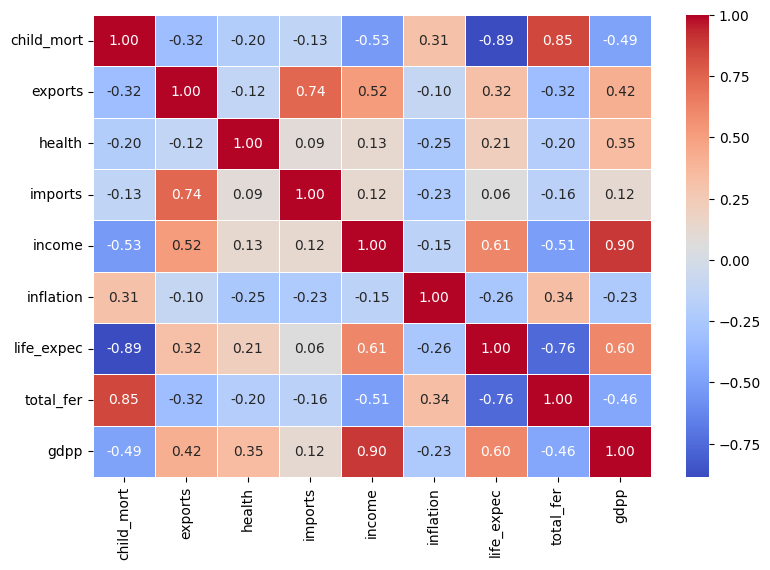

In [101]:
# Correlation matrix between the variables
plt.figure(figsize=(9, 6))
sns.heatmap(
    df_countries.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
)

## Training the model


In [102]:
X = df_countries.copy()

# Drop the country and income_category columns
X.drop(columns=["country", "income_category"], axis=1, inplace=True)

In [103]:
numeric_features = X.select_dtypes(include=[np.number]).columns
numeric_features

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [104]:
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_features)]
)

In [105]:
X_transformed = preprocessor.fit_transform(X)
X_transformed

array([[ 1.27936799, -1.13524796,  0.2742313 , ..., -1.6059239 ,
         1.88970656, -0.67813658],
       [-0.54431031, -0.48015711, -0.10017109, ...,  0.65049307,
        -0.86538974, -0.48561903],
       [-0.27918316, -0.10166017, -0.96529507, ...,  0.67294498,
        -0.04612849, -0.46548008],
       ...,
       [-0.37829611,  1.12117608,  0.00524318, ...,  0.29126251,
        -0.66718138, -0.63693336],
       [ 0.43938573, -0.40736924, -0.59816262, ..., -0.33739098,
         1.12990782, -0.63693336],
       [ 1.1034425 , -0.15261168, -0.34007942, ..., -2.07741401,
         1.61221484, -0.62876892]])

In [106]:
# Calculate covariance matrix, for demonstration purposes
np.cov(X_transformed)

array([[ 1.28101845, -0.30929073, -0.13299078, ..., -0.31162981,
         0.6038062 ,  1.11986219],
       [-0.30929073,  0.19023088,  0.05718309, ...,  0.14855132,
        -0.14287309, -0.40453184],
       [-0.13299078,  0.05718309,  0.3368898 , ...,  0.03260987,
         0.28911912, -0.02412952],
       ...,
       [-0.31162981,  0.14855132,  0.03260987, ...,  0.5954005 ,
        -0.08211639, -0.23881978],
       [ 0.6038062 , -0.14287309,  0.28911912, ..., -0.08211639,
         0.71221987,  0.6856765 ],
       [ 1.11986219, -0.40453184, -0.02412952, ..., -0.23881978,
         0.6856765 ,  1.231984  ]])

In [107]:
# Create a PCA model with 3 components
pca = PCA(n_components=3)

# Fit the PCA model to the data
X_pca = pca.fit_transform(X_transformed)

In [108]:
# Generate dataframe with the PCA components
df_pca = pd.DataFrame(
    data=X_pca,
    columns=["PC1", "PC2", "PC3"],
    index=df_countries.index,
)
df_pca.head(10)

,PC1,PC2,PC3
0,-2.898491,0.043830,-0.674704
1,0.435969,-0.602095,-0.336181
2,-0.294489,-0.393013,1.237849
3,-2.941128,1.746346,1.498419
4,1.038913,0.117437,-0.255625
5,0.005300,-1.713515,0.990698
6,-0.096950,-0.555750,0.231357
7,2.339830,-1.987538,0.349795
8,2.967046,-0.761415,-0.424208
9,-0.188400,-0.364424,0.896714


In [109]:
# Include PCA components in the original dataframe
df_countries = df_countries.join(df_pca)

In [110]:
df_countries.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_category,PC1,PC2,PC3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Low income,-2.898491,0.043830,-0.674704
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Upper middle income,0.435969,-0.602095,-0.336181
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Lower middle income,-0.294489,-0.393013,1.237849
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Lower middle income,-2.941128,1.746346,1.498419
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,High income,1.038913,0.117437,-0.255625
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Upper middle income,0.005300,-1.713515,0.990698
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Upper middle income,-0.096950,-0.555750,0.231357
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,High income,2.339830,-1.987538,0.349795
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,High income,2.967046,-0.761415,-0.424208
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Upper middle income,-0.188400,-0.364424,0.896714


## Visualizing the results


In [117]:
eigenvalues = pca.explained_variance_  # Autovalores
eigenvectors = pca.components_  # Autovetores

print(f"Eigenvalues:\n{eigenvalues}")
print(f"\nEigenvectors:\n{eigenvectors}")

Eigenvalues:
[4.18194258 1.55676483 1.15683401]

Eigenvectors:
[[-0.41944537  0.28242091  0.15068193  0.16069962  0.39721431 -0.20064752
   0.42542863 -0.40370133  0.39213733]
 [ 0.18639458  0.61906392 -0.26537269  0.6623149   0.03301443  0.03814569
  -0.21355639  0.15172601 -0.04196516]
 [-0.02457745  0.11382205 -0.57151155 -0.33939771  0.32266099  0.63616571
   0.11811594  0.02417555  0.14584745]]


In [122]:
px.scatter_3d(
    df_countries,
    x="PC1",
    y="PC2",
    z="PC3",
    color="income_category",
    title="PCA Components",
    labels={"PC1": "PC1", "PC2": "PC2", "PC3": "PC3"},
    hover_data=["country"],
    width=800,
    height=600,
)

In [128]:
# Reconstruct the original data
X_recovered = pca.inverse_transform(X_pca)
X_recovered

array([[ 1.24051071, -0.86825694, -0.06278059, ..., -1.32215438,
         1.1604634 , -1.23684957],
       [-0.28682977, -0.28787365,  0.41760377, ...,  0.27434638,
        -0.27548195,  0.14719535],
       [ 0.01984344, -0.18557564, -0.64752426, ...,  0.10485603,
         0.08918105,  0.08154978],
       ...,
       [ 0.06178006,  0.96128084, -0.10287206, ..., -0.12810115,
         0.00487659,  0.08490176],
       [ 0.75967769, -0.43601395, -0.92852836, ..., -0.66251251,
         0.7873269 , -0.57577658],
       [ 1.28114026, -0.48486169, -0.69796675, ..., -1.2880174 ,
         1.23173122, -1.10450882]])

In [131]:
# Calculate the RMSE between the original data and the reconstructed data
mse = mean_squared_error(X_transformed, X_recovered)
mse

np.float64(0.23847219349860976)